# Solución de ecuaciones
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>


## Búsqueda de raíces por métodos cerrados
Los métodos iterativos cerrados, por intervalos o de horquillado se caracterizan porque para su ejecución requieren un intervalo que contenga al menos una raíz y en su aplicación se reduce continuamente de tamaño el intervalo manteniendo la raíz en su interior.

Sin importar la rapidez de convergencia, los métodos numéricos cerrados al mantener la raíz en el interior del intervalo garantizan la convergencia del método.

## Agenda
1. Generalidades
1. Método de la bisección
1. Método de la falsa posición

In [1]:
# Importar módulos al cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt

# Definir e incluir nuevas funciones al cuaderno
def _buscar_intervalos(fun, ini, fin):
    """ Método para buscar intervalos en los que ocurra cambio de signo.

        ## Parámetros:
            fun (function): función para analizar.
            ini (int): inicio del análisis.
            fin (int): limite final del análisis.
        
        ## Devoluciones:
            I (list): Lista de tuplas con los intervalos donde hay un cero.
    """
    i = ini - 1 # Variable para contar iteraciones
    I = []      # Variable para almacenar los intervalos
    
    while i < fin:
        i += 1
        if fun(i) == 0:
            I.append((i, i))
        elif fun(i) * fun(i+1) < 0:
            I.append((i, i+1))
        else:
            pass
    return I


## 1. Métodos Cerrados
---
Basados en el teorema del valor intermedio, los métodos de horquillado determinan intervalos sucesivamente más pequeños que contienen una raíz; por lo tanto, requieren comenzar con un intervalo tal que la función tome signos opuestos en los puntos finales del intervalo.

> **NOTA:** El _teorema del valor intermedio_ establece que para cada $y$ tal que $f(a)<y<f(b)$ existe un $x \in (a, b)$ tal que $f(x) = y$

<p align="center">
  <img width="400" src="img/intermediate_value_theorem.png">
</p>

## 2. Método de la bisección
---
En análisis numérico; el algoritmo de la bisección o de Bolzano nos permite buscar las raíces de una función real y continua partiendo de intervalo inicial $\color{#a78a4d}{(a, b)}$, dividiendo sucesivamente el intervalo a la mitad y seleccionando el sub intervalo que contiene la raíz; hasta hallar una aproximación aceptable o la raíz que satisface la función.

<p align="center">
  <img width="400" src="img/algorithm_close_1g.png">
</p>

\begin{align}
\tag{1} x_{m_o} &= \frac{b + a}{2} \\
\tag{2} x_o &= x_{m_o} \\
\text{Generalizando (2):$\qquad\qquad$} \\
\tag{3} x_n &= \frac{b_n + a_n}{2} \\
\end{align}

<p align="center">
  <img width="400" src="img/algorithm_close_1a.png">
</p>

### Error:
*  El error absoluto $\color{#a78a4d}{ea}$ cometido tras realizar $\color{#a78a4d}{n>0}$ iteraciones del método de la bisección tiene una cota de tal forma que:

\begin{align}
\tag{4} ea_n \leq \frac{\left| b - a \right|}{2^n}
\end{align}

* Para lograr un error inferior al valor $\color{#a78a4d}{\varepsilon}$, el número $\color{#a78a4d}{n}$ de iteraciones que se debe realizar es:

\begin{align}
\tag{5} {\displaystyle n>{\frac {\ln(b-a)-\ln(\varepsilon )}{\ln(2)}}-1} \\
\end{align}

### Ventajas:
* Método estable, siempre converge.
* Útil como aproximación inicial de otros métodos como _regula falsi_.

### Desventajas:
* No tiene en cuenta la magnitud de los valores de la función en las aproximaciones calculadas $x_n$, solo tiene en cuenta el signo de $f(x)$.
* Método de convergencia lineal, orden de convergencia, $r = 1$.
* Tasa de convergencia $\mu = 0.5$


In [2]:
# Defino el método iterativo de la Bisección
def _biseccion(Func, Xmin, Xmax, Imax, Tmax):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (int): función que depende de una variable.
            Xmin (int): limite inferior de intervalo.
            Xmax (int): limite superior de intervalo.
            Imax (int): número máximo de iteraciones.
            Tmax (int): exponente de tolerancia máxima, T = 1e^Tmax.
        
        ## Devoluciones:
            Km (float): valor de x encontrado.
            No (int)  : iteraciones.
            ea (float): error absoluto final
            Li (list): lista de las soluciones, los errores absolutos y la tabla con la evolución de iteraciones.
    """
    # Inicializar variables
    Xs = Xmax
    Xi = Xmin
    S = []
    E = []
    Tb = f"| I # | {'Xi':>8} | {'Xs':>8} | {'ΔX':>9} | {'Xm':>9} | {'Error Abs':>9} | {'Fm':>9} |\n"
    Tb += "-----------------------------------------------------------------------------\n"
    # Iteraciones
    for i in range(1, Imax + 1):
        ΔX = abs(Xs - Xi)
        Xm = (Xs + Xi) / 2
        ea = ΔX / 2
        S.append(Xm)
        E.append(ea)
        Fm = Func(Xm)
        Tb += f"| {i:3} | {Xi:8.5f} | {Xs:8.5f} | {ΔX:9.5f} | {Xm:9.5f} | {ea:9.5f} | {Fm:9.5f} |\n"
        if ea < (10**Tmax): break
        if Func(Xi) * Func(Xm) < 0:
            Xs = Xm
        else:
            Xi = Xm
            
    # Salida del método
    return i, Xm, ea, [S, E, Tb]


## 3. Método de la falsa posición
---
En análisis numérico; el algoritmo de _regula falsi_ o de la posición falsa nos permite buscar las raíces de una función real y continua partiendo de intervalo inicial $\color{#a78a4d}{(a, b)}$, dividiendo sucesivamente el intervalo con un segmento de línea que conecta las imágenes de los limites del intervalo y seleccionando el sub intervalo que contiene la raíz; hasta hallar una aproximación aceptable o la raíz que satisface la función.

<p align="center">
  <img width="400" src="img/algorithm_close_2g.png">
</p>

\begin{align}
\tag{6} y - f(a) &= \frac{ f(b)-f(a) }{ b-a } \left( x - a \right) \\
\mbox{Despejando $x$ de (6): $\qquad\qquad$} \\
\tag{7} x &= y + a - f(a) \frac{ b-a }{ f(b)-f(a) }\\
\mbox{Evaluando (7) en $y=0$:$\qquad\qquad$} \\
\tag{8} x &= a - f(a) \frac{ b-a }{ f(b)-f(a) }
\end{align}

<p align="center">
  <img width="400" src="img/algorithm_close_2a.png">
</p>

### Ventajas:
* Método estable, siempre converge.
* Tiene en cuenta la magnitud de los valores de la función en las aproximaciones calculadas $x_n$.
* En la mayoría de los casos converge más rápidamente que el método de la bisección.
* Útil como aproximación inicial de otros métodos como el algoritmo de Illinois.

### Desventajas:
* Hay situaciones que pueden ralentizar su convergencia, a veces hasta un grado prohibitivo.
* Orden de convergencia, $r = 1$.
* Tasa de convergencia $\mu = 2/3$

In [3]:
# Defino el método iterativo del punto falso
def _punto_falso(Func, Xmin, Xmax, Imax, Tmax):
    """ Método de la falsa posición para encontrar raíces en un intervalo.

        ## Parámetros:
            funX (int): función que depende de una variable.
            Xmin (int): limite inferior de intervalo.
            Xmax (int): limite superior de intervalo.
            Imax (int): número máximo de iteraciones.
            Tmax (int): exponente de tolerancia máxima, T = 1e^Tmax.
        
        ## Devoluciones:
            Km (float): valor de x encontrado.
            No (int)  : iteraciones.
            ea (float): error absoluto final
            Li (list): lista de las soluciones, los errores absolutos y la tabla con la evolución de iteraciones.
    """
    # Inicializar variables
    Xs = Xmax
    Xi = Xmin
    S = []
    E = []
    Tb = f"| I # | {'Xi':>8} | {'Xs':>8} | {'ΔX':>9} | {'Xm':>9} | {'Error Abs':>9} | {'Fm':>9} |\n"
    Tb += "-----------------------------------------------------------------------------\n"
    # Iteraciones
    for i in range(1, Imax + 1):
        ΔX = abs(Xs - Xi)
        Xm = Xi - Func(Xi)*(Xs - Xi) / (Func(Xs) - Func(Xi))
        if i==1:
            ea = abs(Xi - Xm)
        else:
            ea = abs(S[-1] - Xm)
        # Almacenamiento de la soluciones y el error
        S.append(Xm)
        E.append(ea)
        Fm = Func(Xm)
        Tb += f"| {i:3} | {Xi:8.5f} | {Xs:8.5f} | {ΔX:9.5f} | {Xm:9.5f} | {ea:9.5f} | {Fm:9.5f} |\n"
        if ea < (10**Tmax): break
        if Func(Xi) * Func(Xm) < 0:
            Xs = Xm
        else:
            Xi = Xm
            
    # Salida del método
    return i, Xm, ea, [S, E, Tb]

In [4]:
# Ecuación de la altura para el movimiento parabólico
def altura(θ, Vo, ho, t):
    g = 9.8179
    Voy = Vo * np.sin(θ*np.pi/180)
    y = -(1/2) * g * t**2 + Voy * t + ho
    return y

# Renombrar la función
F = lambda t: altura(45, 12, 3, t) 

# Buscar intervalos
Lista = _buscar_intervalos(F, 0, 5)

# Establecer limites y tolerancia de la búsqueda de raíces
Kmin = Lista[0][0]
Kmax = Lista[0][1]
Orden_Tolerancia = -4
Max_iteraciones = 50

# Buscar raíces
n1, x1, ea1, paso1 =   _biseccion(F, Kmin, Kmax, Max_iteraciones, Orden_Tolerancia)
n2, x2, ea2, paso2 = _punto_falso(F, Kmin, Kmax, Max_iteraciones, Orden_Tolerancia)

In [5]:
print(paso1[2])

| I # |       Xi |       Xs |        ΔX |        Xm | Error Abs |        Fm |
-----------------------------------------------------------------------------
|   1 |  2.00000 |  3.00000 |   1.00000 |   2.50000 |   0.50000 |  -6.46773 |
|   2 |  2.00000 |  2.50000 |   0.50000 |   2.25000 |   0.25000 |  -2.75968 |
|   3 |  2.00000 |  2.25000 |   0.25000 |   2.12500 |   0.12500 |  -1.13575 |
|   4 |  2.00000 |  2.12500 |   0.12500 |   2.06250 |   0.06250 |  -0.38132 |
|   5 |  2.00000 |  2.06250 |   0.06250 |   2.03125 |   0.03125 |  -0.01848 |
|   6 |  2.00000 |  2.03125 |   0.03125 |   2.01562 |   0.01562 |   0.15934 |
|   7 |  2.01562 |  2.03125 |   0.01562 |   2.02344 |   0.00781 |   0.07073 |
|   8 |  2.02344 |  2.03125 |   0.00781 |   2.02734 |   0.00391 |   0.02620 |
|   9 |  2.02734 |  2.03125 |   0.00391 |   2.02930 |   0.00195 |   0.00387 |
|  10 |  2.02930 |  2.03125 |   0.00195 |   2.03027 |   0.00098 |  -0.00730 |
|  11 |  2.02930 |  2.03027 |   0.00098 |   2.02979 |   0.00049 

In [6]:
print(paso2[2])

| I # |       Xi |       Xs |        ΔX |        Xm | Error Abs |        Fm |
-----------------------------------------------------------------------------
|   1 |  2.00000 |  3.00000 |   1.00000 |   2.02085 |   0.02085 |   0.10019 |
|   2 |  2.02085 |  3.00000 |   0.97915 |   2.02704 |   0.00620 |   0.02961 |
|   3 |  2.02704 |  3.00000 |   0.97296 |   2.02887 |   0.00183 |   0.00872 |
|   4 |  2.02887 |  3.00000 |   0.97113 |   2.02941 |   0.00054 |   0.00256 |
|   5 |  2.02941 |  3.00000 |   0.97059 |   2.02957 |   0.00016 |   0.00075 |
|   6 |  2.02957 |  3.00000 |   0.97043 |   2.02962 |   0.00005 |   0.00022 |



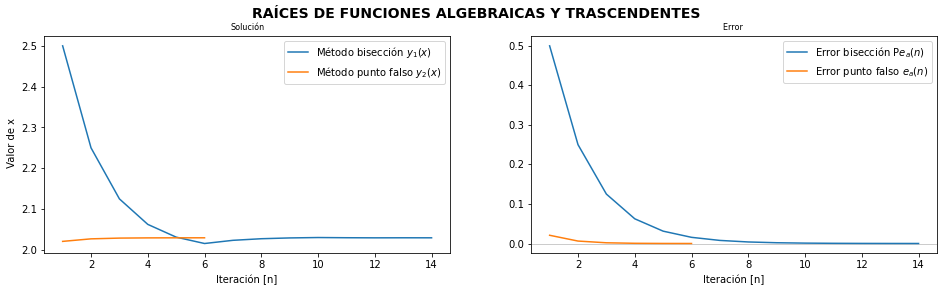

In [7]:
# 
x1 = np.linspace(1, n1, n1, endpoint=True)
x2 = np.linspace(1, n2, n2, endpoint=True)

# Funciones de solución y error
y1 = paso1[0]
e1 = paso1[1]
y2 = paso2[0]
e2 = paso2[1]

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 4)
fig.suptitle('Raíces de funciones algebraicas y trascendentes'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
# ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(x1, y1, label="Método bisección $y_1(x)$")
ax[0].plot(x2, y2, label="Método punto falso $y_2(x)$")
ax[0].set_title("Solución", fontsize=8)
ax[0].set_ylabel(" Valor de x")
ax[0].set_xlabel("Iteración [n]")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[1].plot(x1, e1, label="Error bisección P$e_a(n)$")
ax[1].plot(x2, e2, label="Error punto falso $e_a(n)$")
ax[1].set_title("Error ", fontsize=8)
ax[1].set_xlabel("Iteración [n]")
ax[1].legend()

plt.show()

---
## Mas Recursos

- [Análisis numérico](https://es.wikipedia.org/wiki/An%C3%A1lisis_num%C3%A9rico) (Wikipedia)
- [Búsqueda de raíces](https://es.wikipedia.org/wiki/Resoluci%C3%B3n_num%C3%A9rica_de_ecuaciones_no_lineales) (Wikipedia)
- [Método de bisección](https://es.wikipedia.org/wiki/M%C3%A9todo_de_bisecci%C3%B3n) (Wikipedia)
- [Estabilidad numérica](https://es.wikipedia.org/wiki/Estabilidad_num%C3%A9rica) (Wikipedia)
